In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [4]:
df = pd.read_csv("clicks.csv", dtype={"source_id":"int8", "advertiser_id":"int8"})

In [6]:
df.dtypes

advertiser_id         int8
action_id          float64
source_id             int8
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [7]:
df.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [8]:
df.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [19]:
clicksPosition = df[["touchX", "touchY"]]
clicksPosition.head()

,touchX,touchY
0,0.905,0.078
1,NaN,NaN
2,0.946,0.473
3,0.035,0.431
4,0.054,0.423


In [21]:
clicksPosition = clicksPosition.dropna()

In [35]:
from scipy.stats import gaussian_kde
xPosition = clicksPosition["touchX"].as_matrix()
yPosition = clicksPosition["touchY"].as_matrix()

xy = np.vstack([xPosition,yPosition])
z = gaussian_kde(xy)(xy)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


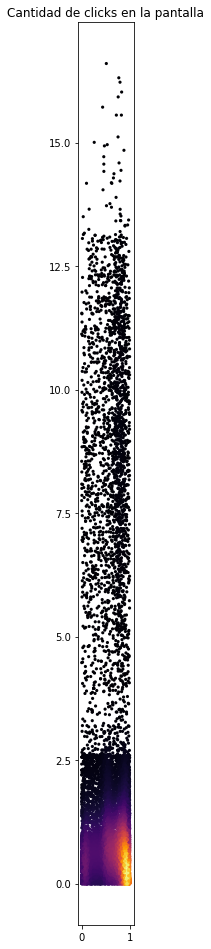

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(xPosition.max(), yPosition.max()))
plt.title("Cantidad de clicks en la pantalla")
ax.scatter(xPosition, yPosition, c=z, cmap="inferno", s=10, edgecolor="");

In [40]:
df["country_code"].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64